<a href="https://colab.research.google.com/github/nishant-harinkhede12/Machine-Learning-Projects/blob/main/MiniBatchKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import MiniBatchKMeans

data = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")



In [21]:

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit_transform(data['ocean_proximity']) 

data['ocean_proximity'] = LE.fit_transform(data['ocean_proximity']) 



In [15]:
#data.head()
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


In [22]:
data['total_bedrooms'].fillna(data['total_bedrooms'].mean(),inplace=True)

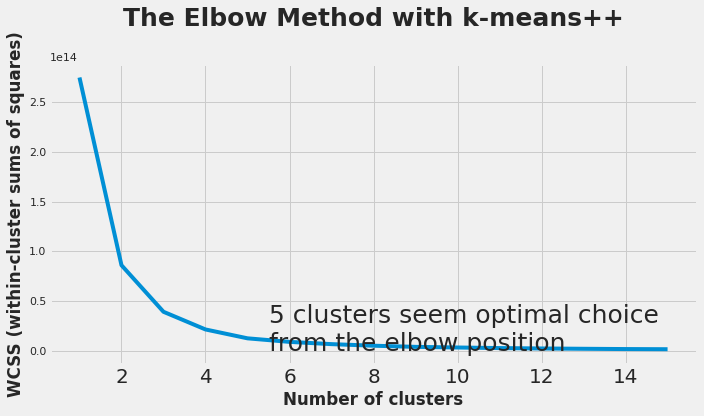

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 16), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=25)
    plt.xlabel('Number of clusters')
    plt.xticks(fontsize=20)
    plt.ylabel('WCSS (within-cluster sums of squares)')
    plt.vlines(x=5,ymin=0,ymax=250000,linestyles='--')
    plt.text(x=5.5,y=110000,s='5 clusters seem optimal choice \nfrom the elbow position',
             fontsize=25,fontdict={'family':'Times New Roman'})
    plt.show()

   median_income  latitude  longitude  Cluster
0         8.3252     37.88    -122.23        1
1         8.3014     37.86    -122.22        1
2         7.2574     37.85    -122.24        1
3         5.6431     37.85    -122.25        1
4         3.8462     37.85    -122.25        1


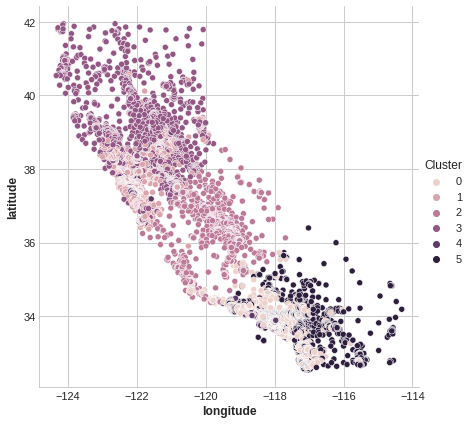

In [19]:
data = data.loc[:, ["median_income", "latitude", "longitude"]]

kmeans = MiniBatchKMeans(n_clusters=6, random_state=0, batch_size=6)
data["Cluster"] = kmeans.fit_predict(data)
data["Cluster"] = data["Cluster"].astype("int")
print(data.head())


plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x='longitude', y='latitude', hue='Cluster', data=data, height=6)
plt.show()

OR TAKE COMPLETE DATASET

   longitude  latitude  ...  ocean_proximity  Cluster
0    -122.23     37.88  ...                3        2
1    -122.22     37.86  ...                3        5
2    -122.24     37.85  ...                3        5
3    -122.25     37.85  ...                3        5
4    -122.25     37.85  ...                3        5

[5 rows x 11 columns]


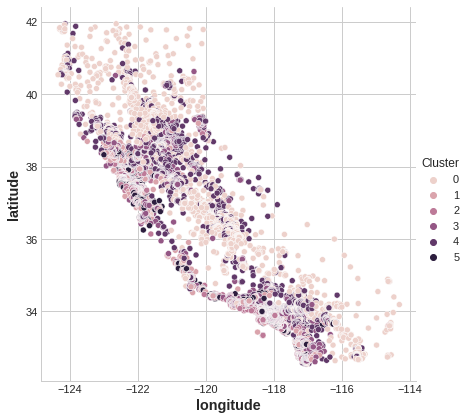

In [24]:


kmeans = MiniBatchKMeans(n_clusters=6, random_state=0, batch_size=6)
data["Cluster"] = kmeans.fit_predict(data)
data["Cluster"] = data["Cluster"].astype("int")
print(data.head())


plt.style.use('seaborn-whitegrid')
plt.rc("figure", autolayout=True)
plt.rc("axes", labelweight='bold', labelsize='large', titleweight='bold', titlesize=14, titlepad=10)
sns.relplot(x='longitude', y='latitude', hue='Cluster', data=data, height=6)
plt.show()